<a href="https://colab.research.google.com/github/pb-jana/Machine-Learning/blob/main/Artificial_Neural_Network_Scikit_Learn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**UPLOADING MODELLING DATASET**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving modelling.csv to modelling (3).csv


In [ ]:
modelling_data = pd.read_csv('modelling.csv')

**EXPLORATORY DATA ANALYSIS - EDA**

In [ ]:
modelling_data.shape

(10000, 14)

In [ ]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
modelling_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
modelling_data.describe().round(2).style.background_gradient()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.570000,650.530000,38.920000,5.010000,76485.890000,1.530000,0.710000,0.520000,100090.240000,0.200000
std,2886.900000,71936.190000,96.650000,10.490000,2.890000,62397.410000,0.580000,0.460000,0.500000,57510.490000,0.400000
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.920000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.250000,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
modelling_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **VISUALIZATION**

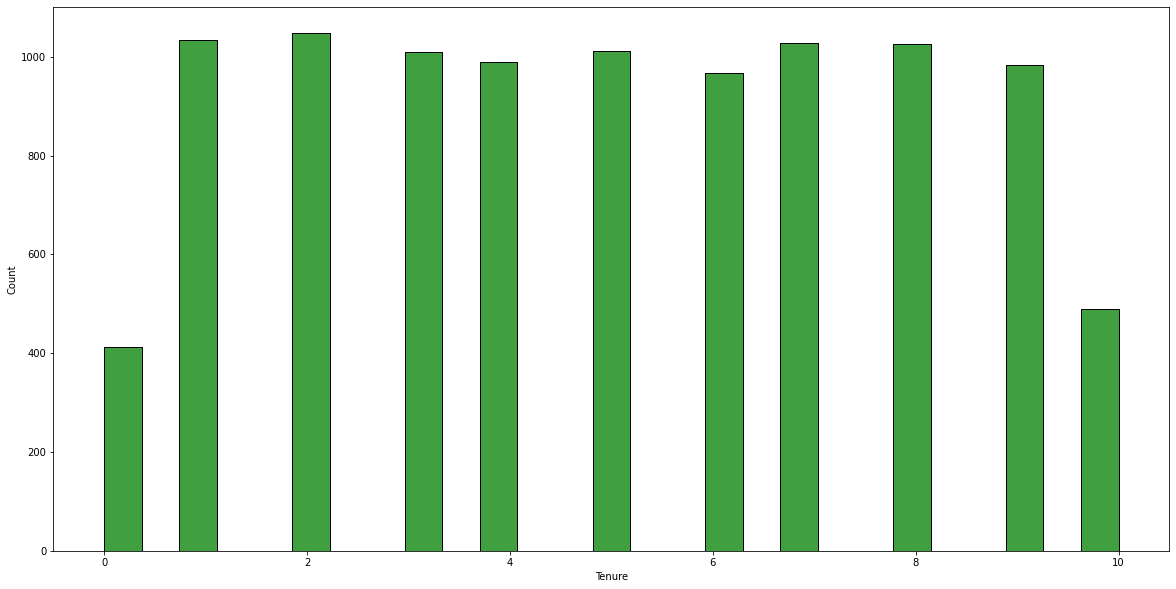

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=modelling_data, x='Tenure', color='green')

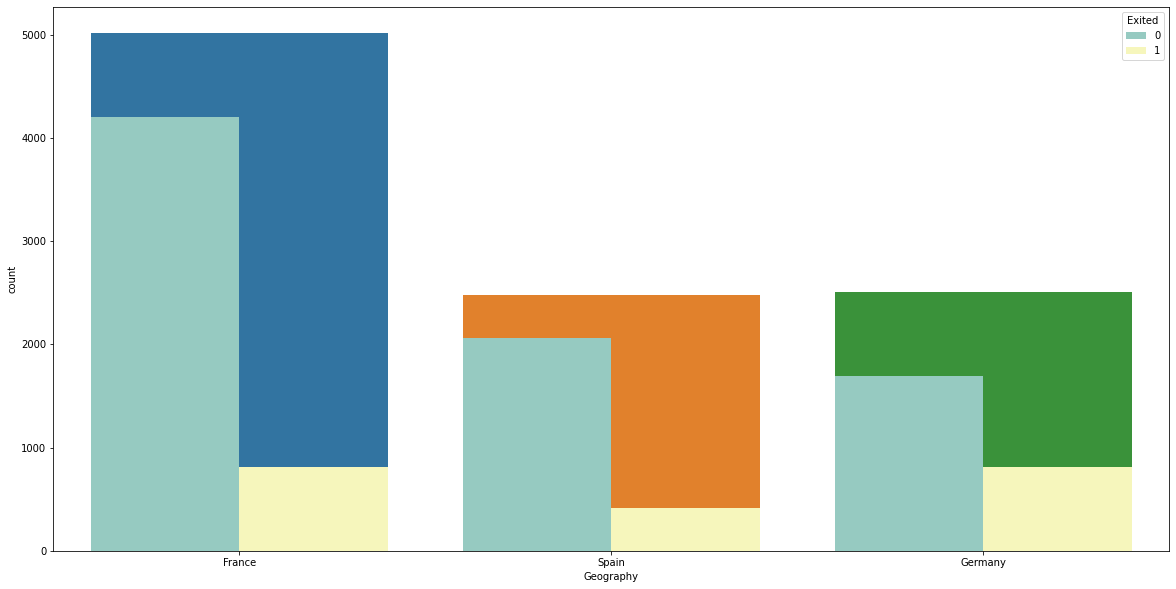

In [ ]:
# area vs count of model
plt.figure(figsize=(20,10))
sns.countplot(data=modelling_data, x='Geography')
sns.countplot(data=modelling_data, x='Geography',hue='Exited',palette='Set3')

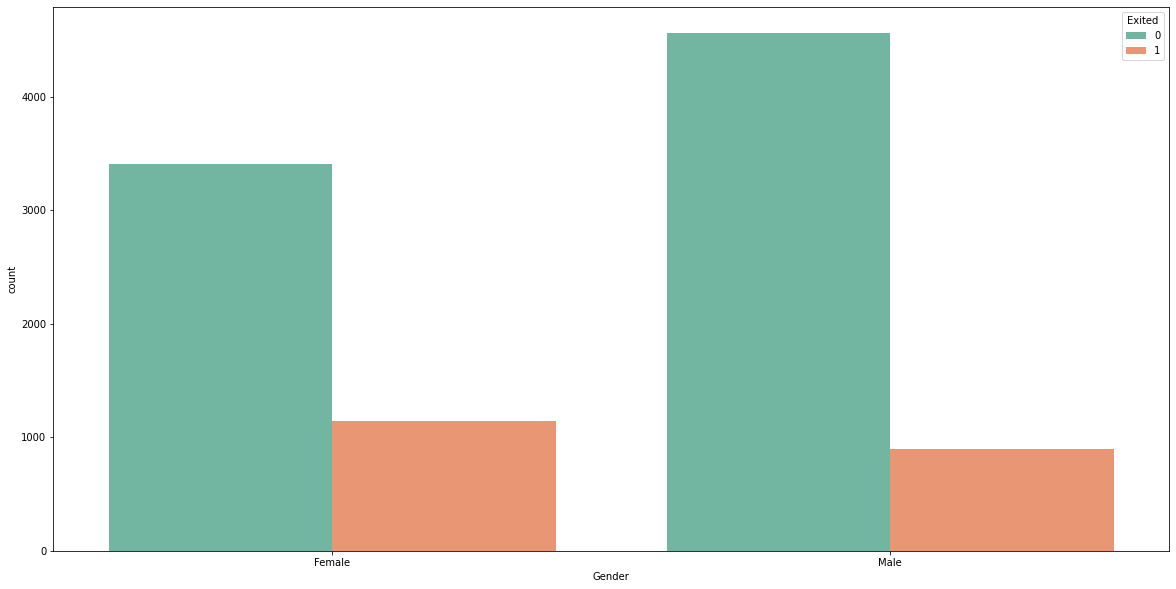

In [ ]:
# male vs female ratio
plt.figure(figsize=(20,10))
sns.countplot(data=modelling_data, x='Gender',hue='Exited',palette='Set2')

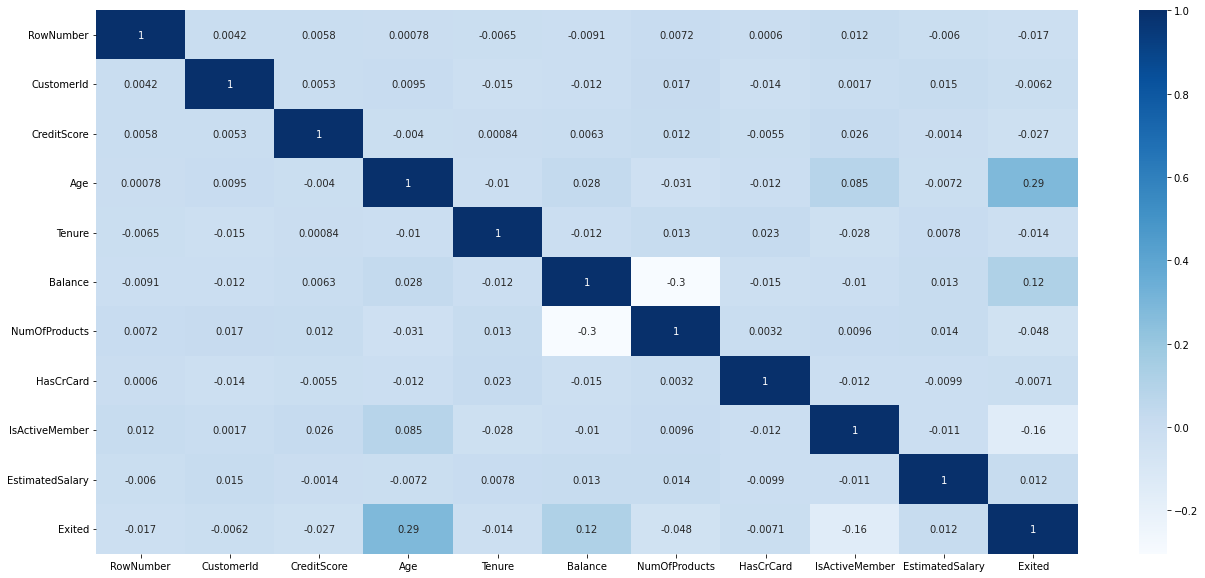

In [ ]:
# checking for multicolinearity present in the modelling data
plt.figure(figsize=(22,10))
sns.heatmap(modelling_data.corr(),cbar=True, annot=True, cmap='Blues')

In [ ]:
# dropping unnecessary column from the modeling data table
modelling_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### **ENCODING**

String Values Convert into Integers (0, 1, 2, 3, ...)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
# in the modeing data table, two columns having string values => Geography and Gender
modelling_data['Geography'] = LE.fit_transform(modelling_data['Geography'])
modelling_data['Gender'] = LE.fit_transform(modelling_data['Gender'])

In [ ]:
modelling_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# equal fractional part for a perticular comlumn
col_to_scale = ['CreditScore','Balance','EstimatedSalary','Age']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
modelling_data[col_to_scale]=scaler.fit_transform(modelling_data[col_to_scale])

In [ ]:
modelling_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,2,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,2,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,0.332,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,0.718,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,0.844,1,1,0.324324,3,0.299226,2,1,0,0.464429,1


### **SPLITING AND SCALING MODELLING DATA**

In [ ]:
X = modelling_data.drop('Exited',axis=1)
y = modelling_data['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting dataset into training and testing dataset
x_train,x_test,y_train , y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

# performing feature scaling dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

---


# **INITIALIZING ARTIFICIAL NEURAL NETWORK - ANN**

---

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# building artificial neural network model
ann_model = Sequential()

In [ ]:
# first input layer
ann_model.add(Dense(9, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
ann_model.add(Dropout(rate = 0.1))
ann_model.add(BatchNormalization())

# hidden layer
ann_model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

ann_model.add(Dropout(rate = 0.1))
ann_model.add(BatchNormalization())

# # second hidden layer
# ann_model.add(tf.keras.layers.Dense(units=6,activation="relu"))

# output layer
ann_model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 
ann_model_history = ann_model.fit(x_train, y_train, validation_split = 0.25, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
235/235 [==============================] - 2s 3ms/step - loss: 0.5944 - accuracy: 0.7349 - val_loss: 0.5295 - val_accuracy: 0.8012
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.8181 - val_loss: 0.4012 - val_accuracy: 0.8352
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8328 - val_loss: 0.3644 - val_accuracy: 0.8528
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3920 - accuracy: 0.8317 - val_loss: 0.3602 - val_accuracy: 0.8544
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3885 - accuracy: 0.8371 - val_loss: 0.3558 - val_accuracy: 0.8556
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.8357 - val_loss: 0.3642 - val_accuracy: 0.8560
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.8397 - val_loss: 0.3563 - val_accuracy: 0.8596
Epoch 

In [ ]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 99        
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 batch_normalization_8 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 7)                 70        
                                                                 
 dropout_9 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_9 (Batc  (None, 7)                28        
 hNormalization)                                      

In [ ]:
ann_model_loss = pd.DataFrame(ann_model.history.history)

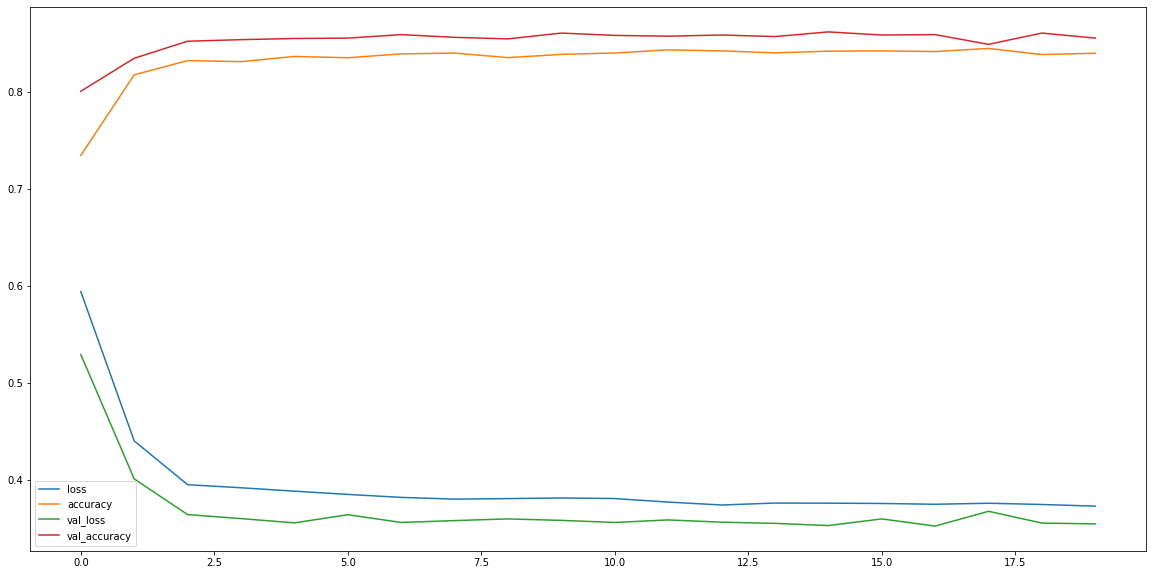

In [ ]:
ann_model_loss.plot (figsize = (20,10))

### **ANN MODEL EVALUATION**
Checking Accruracy of the ANN MODEL

In [ ]:
model_accuracy = ann_model.evaluate(x_test,y_test)[1]
print(f'\nAccuracy of Artificial Neural Network Model is {model_accuracy}')

79/79 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8560

Accuracy of Artificial Neural Network Model is 0.8560000061988831


In [ ]:
y_predicted = ann_model.predict(x_test)
y_predicted = [1 if y>=0.5 else 0 for y in y_predicted] 
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(15)

79/79 [==============================] - 0s 2ms/step


,Y_test,Y_predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,1,0
6363,0,0
439,0,0


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2265
           1       0.37      0.79      0.51       235

    accuracy                           0.86      2500
   macro avg       0.67      0.83      0.71      2500
weighted avg       0.92      0.86      0.88      2500



Text(159.0, 0.5, 'Actual')

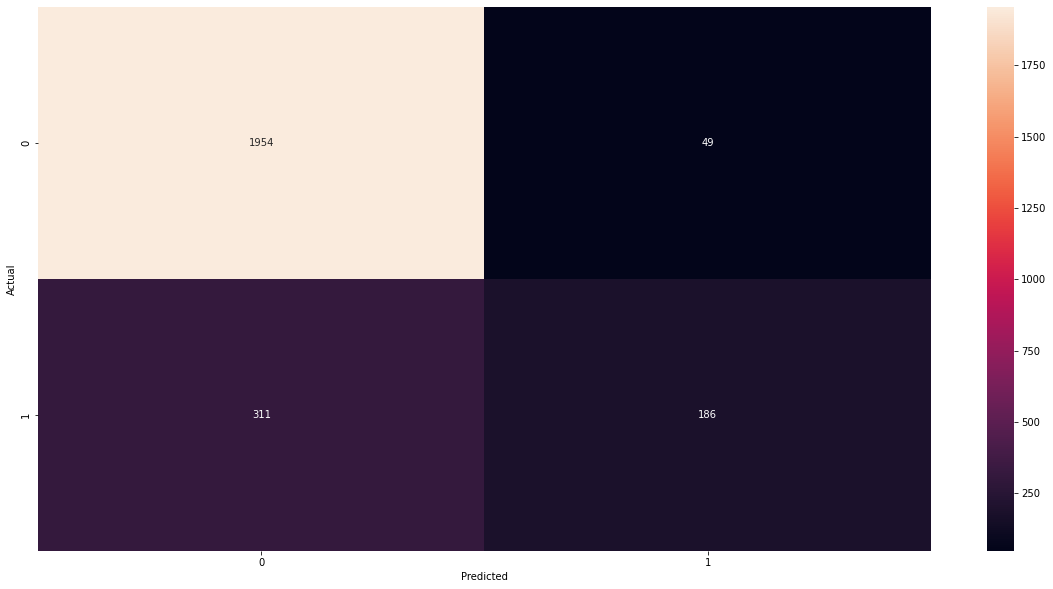

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')